In [28]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D,Bidirectional

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

In [29]:
df = pd.read_csv('/content/drive/MyDrive/DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [31]:

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)

    return numerator / (denominator + 1e-7)

In [32]:
dfx = df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']]
dfx = MinMaxScaler(dfx)



In [33]:
X_train = dfx[['humidity', 'wind_speed', 'meanpressure']]
y_train = dfx['meantemp']

In [34]:
time_step = 10
step = 1

def create_dataset(X, y, time_step, step):
    Xs, ys = [], []

    for i in range(0, len(X) - time_step, step):
        v = X.iloc[i : (i + time_step)].values
        labels = y.iloc[i + time_step]

        Xs.append(v)
        ys.append(labels)

    return np.array(Xs), np.array(ys)

In [35]:
X, y = create_dataset(X_train, y_train, time_step, step)

X.shape

(1452, 10, 3)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
model = Sequential([
    SimpleRNN(20, activation='relu', input_shape=(X.shape[1:]), return_sequences=True),
    Dropout(0.5),
    SimpleRNN(20, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 10, 20)            480       
                                                                 
 dropout_4 (Dropout)         (None, 10, 20)            0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 20)                820       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.compile(loss='mse', optimizer='adam')


In [38]:
history = model.fit(X, y, epochs=500, batch_size=32, validation_split=0.33, shuffle=False)


Epoch 1/500
31/31 [==============================] - 3s 19ms/step - loss: 0.2722 - val_loss: 0.1329
Epoch 2/500
31/31 [==============================] - 0s 9ms/step - loss: 0.1819 - val_loss: 0.1174
Epoch 3/500
31/31 [==============================] - 0s 9ms/step - loss: 0.1325 - val_loss: 0.0662
Epoch 4/500
31/31 [==============================] - 0s 10ms/step - loss: 0.0936 - val_loss: 0.0466
Epoch 5/500
31/31 [==============================] - 0s 10ms/step - loss: 0.0768 - val_loss: 0.0402
Epoch 6/500
31/31 [==============================] - 0s 15ms/step - loss: 0.0662 - val_loss: 0.0440
Epoch 7/500
31/31 [==============================] - 1s 24ms/step - loss: 0.0680 - val_loss: 0.0400
Epoch 8/500
31/31 [==============================] - 1s 17ms/step - loss: 0.0579 - val_loss: 0.0363
Epoch 9/500
31/31 [==============================] - 0s 14ms/step - loss: 0.0630 - val_loss: 0.0318
Epoch 10/500
31/31 [==============================] - 0s 14ms/step - loss: 0.0568 - val_loss: 0.0341
E

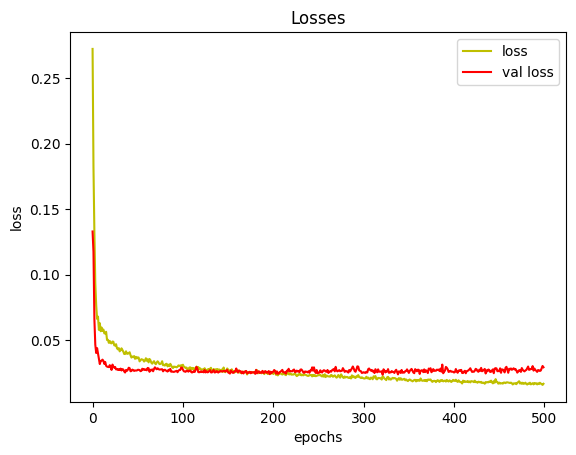

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x = np.arange(0, len(history.history['loss']))

plt.plot(x, loss, 'y', label='loss')
plt.plot(x, val_loss, 'r', label='val loss')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [40]:
test_df = pd.read_csv('/content/drive/MyDrive/DailyDelhiClimateTest.csv')


In [41]:
test_df_1 = test_df.drop(['date'], axis =1)
test_df_1 = MinMaxScaler(test_df_1)

In [42]:
X_t = test_df_1.drop(['meantemp'], axis=1)
y_t = test_df_1['meantemp']

X_test, y_test = create_dataset(X_t, y_t, time_step, step)

X.shape

(1452, 10, 3)

In [43]:
from sklearn.metrics import mean_squared_error as mse

y_pred = model.predict(X)
print(mse(y, y_pred))

46/46 [==============================] - 1s 5ms/step
0.016796065816430436


# LSTM

In [44]:
model = Sequential([
    LSTM(20, activation='relu', input_shape=(X.shape[1:]), return_sequences=True),
    Dropout(0.5),
    LSTM(20, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 20)            1920      
                                                                 
 dropout_6 (Dropout)         (None, 10, 20)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5221 (20.39 KB)
Trainable params: 5221 (20.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.compile(loss='mse', optimizer='adam')


In [46]:
history = model.fit(X, y, epochs=500, batch_size=32, validation_split=0.33, shuffle=False)


Epoch 1/500
31/31 [==============================] - 5s 26ms/step - loss: 0.2617 - val_loss: 0.1408
Epoch 2/500
31/31 [==============================] - 0s 13ms/step - loss: 0.1043 - val_loss: 0.0658
Epoch 3/500
31/31 [==============================] - 0s 14ms/step - loss: 0.0813 - val_loss: 0.0419
Epoch 4/500
31/31 [==============================] - 0s 13ms/step - loss: 0.0603 - val_loss: 0.0351
Epoch 5/500
31/31 [==============================] - 0s 13ms/step - loss: 0.0529 - val_loss: 0.0343
Epoch 6/500
31/31 [==============================] - 0s 14ms/step - loss: 0.0516 - val_loss: 0.0326
Epoch 7/500
31/31 [==============================] - 0s 14ms/step - loss: 0.0481 - val_loss: 0.0317
Epoch 8/500
31/31 [==============================] - 0s 15ms/step - loss: 0.0492 - val_loss: 0.0326
Epoch 9/500
31/31 [==============================] - 0s 16ms/step - loss: 0.0479 - val_loss: 0.0297
Epoch 10/500
31/31 [==============================] - 0s 13ms/step - loss: 0.0467 - val_loss: 0.0319

In [47]:
test_df = pd.read_csv('/content/drive/MyDrive/DailyDelhiClimateTest.csv')


In [48]:
test_df_1 = test_df.drop(['date'], axis =1)
test_df_1 = MinMaxScaler(test_df_1)

In [49]:
X_t = test_df_1.drop(['meantemp'], axis=1)
y_t = test_df_1['meantemp']

X_test, y_test = create_dataset(X_t, y_t, time_step, step)

X.shape

(1452, 10, 3)

In [50]:
from sklearn.metrics import mean_squared_error as mse

y_pred = model.predict(X)
print(mse(y, y_pred))

46/46 [==============================] - 0s 3ms/step
0.0217301813867583


# CNN

In [51]:
model = Sequential([
    Conv1D(64, 2 , activation='relu', input_shape=(X.shape[1:])),
    Dropout(0.5),
    Conv1D(64, 5 , activation='relu'),
    Flatten(),
    Dense(10 , activation = 'relu'),
    Dense(1)
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 9, 64)             448       
                                                                 
 dropout_8 (Dropout)         (None, 9, 64)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 64)             20544     
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                3210      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 24213 (94.58 KB)
Trainable params: 24213

In [52]:
model.compile(loss='mse', optimizer='adam')


In [53]:
history = model.fit(X, y, epochs=500, batch_size=32, validation_split=0.33, shuffle=False)


Epoch 1/500
31/31 [==============================] - 1s 11ms/step - loss: 0.1510 - val_loss: 0.0491
Epoch 2/500
31/31 [==============================] - 0s 7ms/step - loss: 0.0598 - val_loss: 0.0492
Epoch 3/500
31/31 [==============================] - 0s 6ms/step - loss: 0.0472 - val_loss: 0.0377
Epoch 4/500
31/31 [==============================] - 0s 5ms/step - loss: 0.0454 - val_loss: 0.0367
Epoch 5/500
31/31 [==============================] - 0s 7ms/step - loss: 0.0444 - val_loss: 0.0380
Epoch 6/500
31/31 [==============================] - 0s 6ms/step - loss: 0.0438 - val_loss: 0.0363
Epoch 7/500
31/31 [==============================] - 0s 7ms/step - loss: 0.0427 - val_loss: 0.0357
Epoch 8/500
31/31 [==============================] - 0s 6ms/step - loss: 0.0422 - val_loss: 0.0326
Epoch 9/500
31/31 [==============================] - 0s 7ms/step - loss: 0.0421 - val_loss: 0.0339
Epoch 10/500
31/31 [==============================] - 0s 8ms/step - loss: 0.0400 - val_loss: 0.0321
Epoch 11

In [54]:
test_df = pd.read_csv('/content/drive/MyDrive/DailyDelhiClimateTest.csv')


In [55]:
test_df_1 = test_df.drop(['date'], axis =1)
test_df_1 = MinMaxScaler(test_df_1)

In [56]:
X_t = test_df_1.drop(['meantemp'], axis=1)
y_t = test_df_1['meantemp']

X_test, y_test = create_dataset(X_t, y_t, time_step, step)

X.shape

(1452, 10, 3)

In [57]:
from sklearn.metrics import mean_squared_error as mse

y_pred = model.predict(X)
print(mse(y, y_pred))

46/46 [==============================] - 0s 3ms/step
0.011843539695879616
